# Troop Booth Signups Analysis

This notebook loads data from `data/2025_booth_signups_trimmed.csv` (which contains columns such as **Troop**, **Troop Email**, **Slot Start Time**, **Slot End Time**, **When Selected Date**, **When Selected Time**, **User Selecting**) and performs statistical analysis focused on the number of booth signup events per troop. In addition, the notebook identifies and labels potential outliers in the distribution of booth signup counts.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Load the Data

The data file is located at `data/2025_booth_signups_trimmed.csv`. It is assumed that the file has a header with the following columns:

- Troop
- Troop Email
- Slot Start Time
- Slot End Time
- When Selected Date
- When Selected Time
- User Selecting

Let's load the data into a pandas DataFrame.

In [12]:
# Define the path to the data file
data_file = 'data/2025_booth_signups_council_trimmed.csv'

# Load the CSV file (with header)
df = pd.read_csv(data_file)

# Display the first few rows
print("Data preview:")
df.head()

Data preview:


,3586,richgrl0810@gmail.com,2000/01/01 16:00:00,2000/01/01 18:00:00,2025/01/14 20:05:19,2025/01/14 20:05:19.1
0,4997,azgstroop4997@gmail.com,2000/01/01 18:00:00,2000/01/01 20:00:00,2025/01/15 20:00:02,2025/01/15 20:00:02
1,none,NaN,NaN,NaN,NaN,NaN
2,212,nikkigs212@gmail.com,2000/01/01 16:00:00,2000/01/01 18:00:00,2025/01/15 20:00:08,2025/01/15 20:00:08
3,212,nikkigs212@gmail.com,2000/01/01 18:00:00,2000/01/01 20:00:00,2025/01/15 20:00:08,2025/01/15 20:00:08
4,212,nikkigs212@gmail.com,2000/01/01 12:00:00,2000/01/01 14:00:00,2025/01/18 19:41:44,2025/01/18 19:41:44


## 2. Data Preparation

We will convert the time columns to datetime objects. (Note: The sample times use a format like `2000/01/01 14:00:00`, which we assume is consistent for the time fields.)

In our analysis we focus on counting the number of booth signup events per troop (each row is one event).

In [13]:
# Convert time columns to datetime objects
df['Slot Start Time'] = pd.to_datetime(df['Slot Start Time'], format='%Y/%m/%d %H:%M:%S', errors='coerce')
df['Slot End Time']   = pd.to_datetime(df['Slot End Time'], format='%Y/%m/%d %H:%M:%S', errors='coerce')

# If desired, you can also convert the When Selected Date and When Selected Time
df['When Selected Date'] = pd.to_datetime(df['When Selected Date'], format='%Y/%m/%d %H:%M:%S', errors='coerce')
df['When Selected Time'] = pd.to_datetime(df['When Selected Time'], format='%Y/%m/%d %H:%M:%S', errors='coerce')

# Check the data types
df.info()

KeyError: 'Slot Start Time'

## 3. Aggregating Booth Signups per Troop

Since each row represents one booth signup event, we can count the number of events per troop by grouping on the **Troop** column.

In [ ]:
# Group by Troop and count the number of signup events per troop
troop_counts = df.groupby('Troop').size().reset_index(name='Num_Booths')

# Sort by number of booths (signup events)
troop_counts.sort_values('Num_Booths', ascending=False, inplace=True)
print("Booth signup counts per troop:")
print(troop_counts)

# Compute descriptive statistics
desc_stats = troop_counts['Num_Booths'].describe()
print("\nDescriptive statistics for booth signups per troop:")
print(desc_stats)

Booth signup counts per troop:
    Troop  Num_Booths
627  none        2199
230  3396         271
60    203         155
306  3829          85
481   558          84
..    ...         ...
54   1941           1
87   2167           1
39   1658           1
48   1775           1
28   1411           1

[628 rows x 2 columns]

Descriptive statistics for booth signups per troop:
count     628.000000
mean       18.305732
std        88.962147
min         1.000000
25%         5.000000
50%        10.000000
75%        19.000000
max      2199.000000
Name: Num_Booths, dtype: float64


## 4. Outlier Detection

We use the Interquartile Range (IQR) method to identify potential outliers in the number of booth signup events per troop.

An outlier is defined as a troop whose count is below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.

In [5]:
Q1 = troop_counts['Num_Booths'].quantile(0.25)
Q3 = troop_counts['Num_Booths'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# Identify outlier troops
outliers = troop_counts[(troop_counts['Num_Booths'] < lower_bound) | (troop_counts['Num_Booths'] > upper_bound)]
print("\nOutlier troops (by number of booth signups):")
print(outliers)

Q1: 5.0, Q3: 19.0, IQR: 14.0
Lower bound: -16.0, Upper bound: 40.0

Outlier troops (by number of booth signups):
    Troop  Num_Booths
627  none        2199
230  3396         271
60    203         155
306  3829          85
481   558          84
79   2121          73
602   872          68
466  4929          67
262  3587          63
599    80          62
559  7121          61
470  4997          61
562  7190          61
78    212          60
302  3822          59
340  3983          59
396   436          59
42   1682          58
556  7073          58
255  3561          57
16    123          56
423  4520          55
501  6310          53
476  5381          52
578  7425          52
228  3392          50
172  3108          47
523  6527          46
521  6520          45
341  3985          45
409  4458          45
413  4491          43
618  9653          43
130  2589          42
360   417          42
169  3092          41
268  3605          41


## 5. Visualization with Outlier Labels

Below is a boxplot of the booth signup counts per troop. In addition, we overlay a stripplot (jittered points) for each troop and label the outlier points with the corresponding troop number.

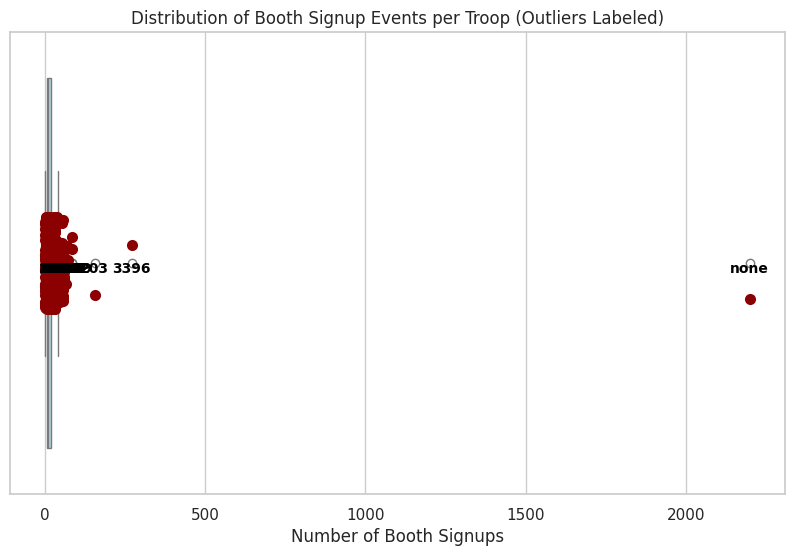

In [ ]:
plt.figure(figsize=(10,6))

# Create a boxplot of the booth signup counts
ax = sns.boxplot(x='Num_Booths', data=troop_counts, color='lightblue')

# Overlay a stripplot of individual troop counts
sns.stripplot(x='Num_Booths', data=troop_counts, color='darkred', size=8, jitter=True, ax=ax)

# Annotate outliers with their Troop number
for index, row in troop_counts.iterrows():
    if row['Num_Booths'] < lower_bound or row['Num_Booths'] > upper_bound:
        # The y-value: use a slight vertical offset (here 0) because stripplot adds jitter.
        ax.text(row['Num_Booths'], 0.02, str(row['Troop']), horizontalalignment='center',
                color='black', weight='bold', fontsize=10)

plt.title('Distribution of Booth Signup Events per Troop (Outliers Labeled)')
plt.xlabel('Number of Booth Signups')
plt.show()

## 6. Save the Summary Data

Finally, we save the aggregated summary (the number of booth signup events per troop) to a CSV file for further use.

In [7]:
output_file = 'troop_booth_summary.csv'
troop_counts.to_csv(output_file, index=False)
print(f"Summary data saved to {output_file}")

Summary data saved to troop_booth_summary.csv


## Conclusion

In this notebook we have:

- Loaded the troop booth signup data from `data/2025_booth_signups_trimmed.csv`
- Prepared the data by converting time fields to datetime
- Aggregated the data to compute the number of signup events per troop
- Computed descriptive statistics and used the IQR method to identify potential outliers
- Visualized the distribution with a boxplot and overlayed a stripplot, labeling the outlier troops with their troop numbers
- Saved the aggregated summary to a CSV file

Feel free to extend or modify this analysis as needed.